In [23]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

gpus = tf.config.experimental.list_physical_devices('GPU')

Found 1437 files belonging to 2 classes.


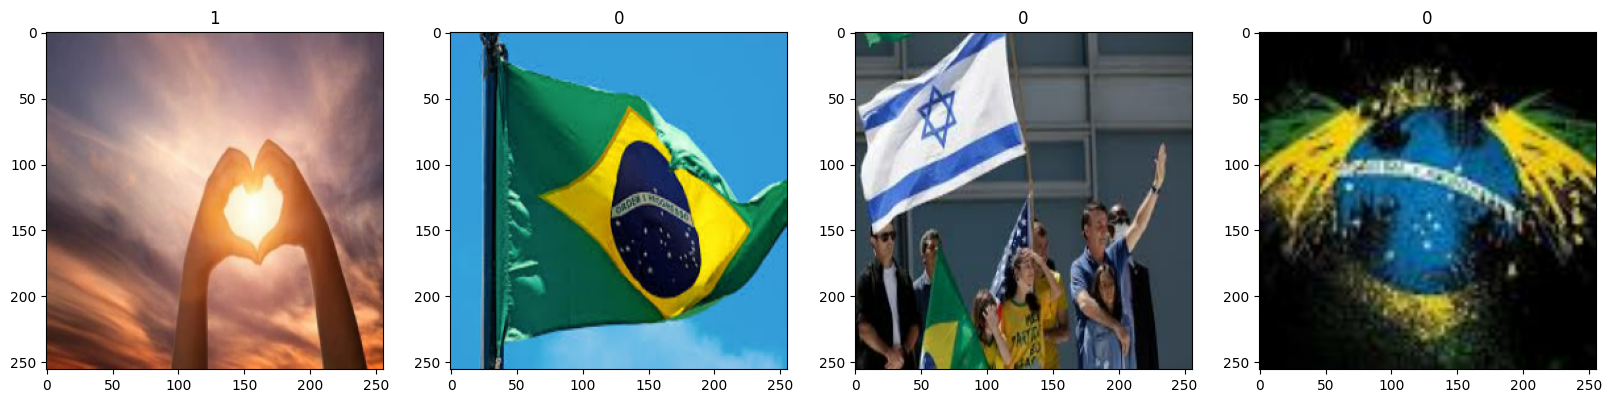

In [24]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
data_dir = 'data'
image_exts = ['jpeg','jpg','png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image not in list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")

data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(batch[1][idx])

In [25]:
gpus

[]

In [9]:
scaled = batch[0] / 255

In [10]:
scaled.max()

1.0

In [11]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()

In [12]:
batch = scaled_iterator.next()
batch[0].max()

1.0

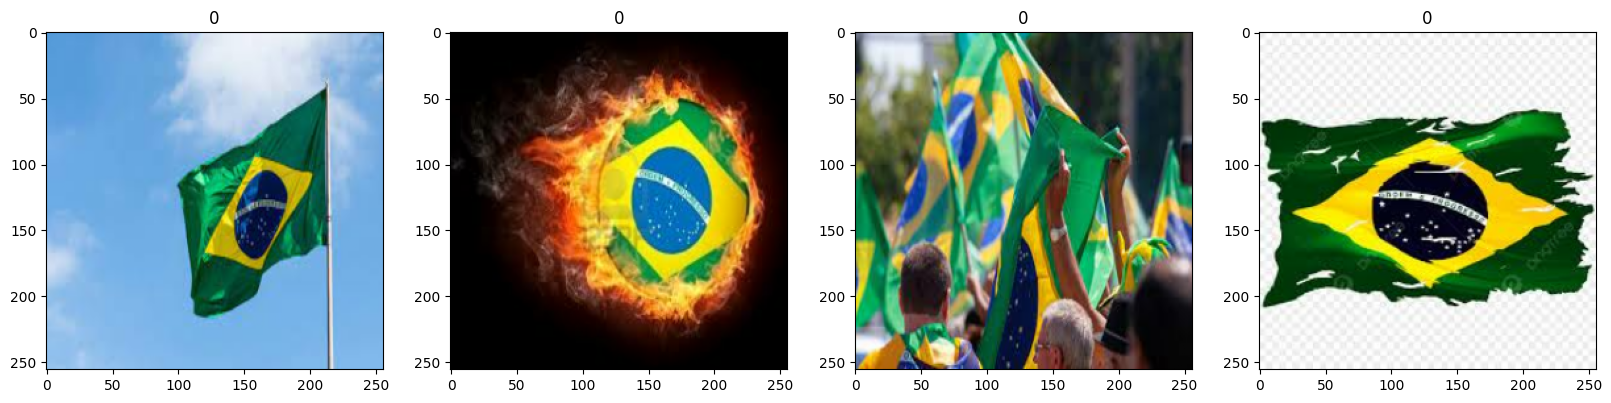

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img)
        ax[idx].title.set_text(batch[1][idx])


In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [16]:
train_size+val_size+test_size

45

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [21]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
31/31 [==============================] - 18s 468ms/step - loss: 0.5128 - accuracy: 0.7833 - val_loss: 0.3033 - val_accuracy: 0.8819
Epoch 2/20
31/31 [==============================] - 15s 463ms/step - loss: 0.3259 - accuracy: 0.8810 - val_loss: 0.2445 - val_accuracy: 0.9271
Epoch 3/20
31/31 [==============================] - 15s 465ms/step - loss: 0.2275 - accuracy: 0.9113 - val_loss: 0.2045 - val_accuracy: 0.9167
Epoch 4/20
31/31 [==============================] - 15s 465ms/step - loss: 0.1654 - accuracy: 0.9415 - val_loss: 0.1601 - val_accuracy: 0.9236
Epoch 5/20
25/31 [=======================>......] - ETA: 2s - loss: 0.1537 - accuracy: 0.9425